**How to Minimize the Loss of Neural Networks**


Neural networks minimize the loss through a process called gradient descent. Gradient descent is an iterative algorithm that updates the weights of the neural network in the direction that reduces the loss function.

To understand how gradient descent works, it is helpful to first understand the concept of the loss function. The loss function is a measure of how well the neural network is performing on a given task. For example, in a classification task, the loss function might be the cross-entropy between the predicted and true labels.

Gradient descent works by calculating the gradient of the loss function with respect to the weights of the neural network. The gradient is a vector that points in the direction of the steepest increase in the loss function. Gradient descent then updates the weights of the neural network in the opposite direction of the gradient. This process is repeated until the loss function converges to a minimum.

Here is a simplified algorithm for gradient descent:

1. Initialize the weights of the neural network.
2. Calculate the loss function and its gradient.
3. Update the weights of the neural network in the opposite direction of the gradient.
4. Repeat steps 2 and 3 until the loss function converges to a minimum.

Loss 0.3335360866913025


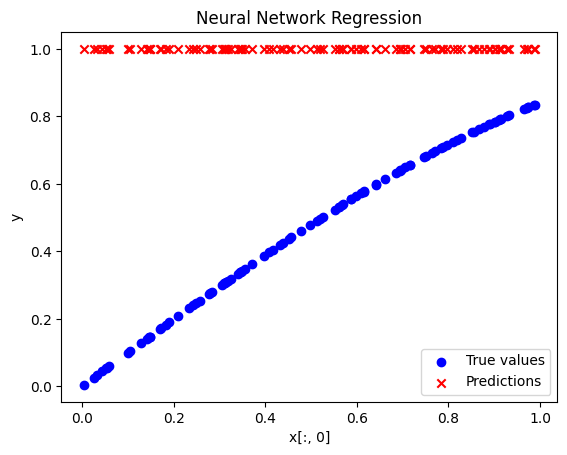

In [5]:
from IPython.core.alias import default_aliases
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size):
    self.W1 = np.random.randn(input_size, hidden_size)
    self.b1 = np.zeros(hidden_size)
    self.W2 = np.random.randn(hidden_size, output_size)
    self.b2 = np.zeros(output_size)

  def forward(self, x):
    self.z1 = np.dot(x, self.W1) + self.b1
    self.a1 = np.tanh(self.z1)
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = np.tanh(self.z2)
    return self.a2

  def loss(self, y_pred, y_true):
    return np.mean((y_pred - y_true) **2)

  def gradient_descent(self, x, y, learning_rate):
    y_pred = self.forward(x)
    loss = self.loss(y_pred, y)

    # Backpropagation
    da2 = 2.0 * (y_pred -y)
    dz2 = da2 * (1 - np.tanh(self.z2) ** 2)
    dW2 = np.dot(self.a1.T, dz2)
    db2 = np.sum(dz2, axis = 0)

    da1 = np.dot(dz2, self.W2.T)
    dz1 = da1 * (1 - np.tanh(self.z1) ** 2)
    dW1 = np.dot(x.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Update weights and biases
    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1
    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2

if __name__ == "__main__":
  x = np.random.rand(100, 2)
  y = np.sin(x[:, 0]).reshape(-1, 1)

  neural_network = NeuralNetwork(2, 10, 1)

  learning_rate =0.01
  for i in range(1000):
    neural_network.gradient_descent(x, y, learning_rate)

  y_pred = neural_network.forward(x)
  loss = neural_network.loss(y_pred, y)
  print("Loss", loss)

  # Visualization
  plt.scatter(x[:, 0], y.ravel(), color="blue", label = "True values")
  plt.scatter(x[:, 0], y_pred.ravel(), color="red", label="Predictions", marker="x")
  plt.legend()
  plt.title('Neural Network Regression')
  plt.xlabel("x[:, 0]")
  plt.ylabel("y")
  plt.show()

In practice, gradient descent is implemented using a variety of different techniques, such as batch gradient descent, stochastic gradient descent, and mini-batch gradient descent. These techniques differ in how they calculate the gradient of the loss function and how they update the weights of the neural network.

Here are some tips for using gradient descent to minimize the loss of a neural network:


*   Choose a good learning rate. The learning rate controls how quickly the neural network updates its weights. If the learning rate is too high, the neural network may not converge to a minimum. If the learning rate is too low, the neural network may take a long time to converge.
*   Use momentum. Momentum is a technique that helps gradient descent to converge more quickly. Momentum works by averaging the gradients over several iterations. This helps to smooth out the gradient and prevents the neural network from getting stuck in local minima.
* Use regularization. Regularization is a technique that helps to prevent the neural network from overfitting the training data. Overfitting occurs when the neural network learns the training data too well and is unable to generalize to new data. Regularization works by adding a penalty to the loss function that encourages the neural network to have simpler weights.

Gradient descent is a powerful tool for minimizing the loss of neural networks. However, it is important to use it carefully and to choose the appropriate parameters.